## N-grams and Text Analysis
*Submitted by:*  
**Christian Elijah Darvin**  
BCS32  
College of Information and Computer Studies - De La Salle University Dasmariñas

In [125]:
# Import necessary libraries for building the ngram model
import nltk
import re
import random
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from string import punctuation

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Preprocess

In [126]:
def preprocess(user_text):
    sentences = re.split(r"\n", user_text)
    cleaned_sentences = []

    for sentence in sentences:
        text_token = word_tokenize(sentence.lower())
        clean_words = [word for word in text_token if word not in punctuation]
        cleaned_sentences.append(clean_words)

    return cleaned_sentences

### Ngram Model

In [127]:
from collections import defaultdict


def ngram_model(sentences, n):
    """
    Generates an n-gram model from a list of sentences.
    Args:
        sentences (list of list of str): A list where each element is a sentence represented as a list of words.
        n (int): The number of words in each n-gram.
    Returns:
        defaultdict: A dictionary where keys are n-grams (tuples of words) and values are the counts of those n-grams in the input sentences.
    """
    ngram_count = defaultdict(int)
    for sentence in sentences:
        for i in range(len(sentence) - n + 1):
            n_gram = tuple(sentence[i : i + n])
            ngram_count[n_gram] += 1

    return ngram_count

## Sample Sentences from Wikipedia

1. Algorithms and data structures are central to computer science. The theory of computation concerns abstract models of computation and general classes of problems that can be solved using them. The fields of cryptography and computer security involve studying the means for secure communication and preventing security vulnerabilities. Computer graphics and computational geometry address the generation of images. Programming language theory considers different ways to describe computational processes, and database theory concerns the management of repositories of data. Computer architecture describes the construction of computer components and computer-operated equipment. Artificial intelligence and machine learning aim to synthesize goal-orientated processes such as problem-solving, decision-making, environmental adaptation, planning and learning found in humans and animals. Within artificial intelligence, computer vision aims to understand and process image and video data, while natural language processing aims to understand and process textual and linguistic data.
   
2. Religion is a range of social-cultural systems, including designated behaviors and practices, morals, beliefs, worldviews, texts, sanctified places, prophecies, ethics, or organizations, that generally relate humanity to supernatural, transcendental, and spiritual elements -although there is no scholarly consensus over what precisely constitutes a religion. Different religions may or may not contain various elements ranging from the divine, sacredness, faith, and a supernatural being or beings. The origin of religious belief is an open question, with possible explanations including awareness of individual death, a sense of community, and dreams. Religions have sacred histories, narratives, and mythologies, preserved in oral traditions, sacred texts, symbols, and holy places, that may attempt to explain the origin of life, the universe, and other phenomena.

3. The Philippines, officially the Republic of the Philippines, is an archipelagic country in Southeast Asia. In the western Pacific Ocean, it consists of 7,641 islands, with a total area of roughly 300,000 square kilometers, which are broadly categorized in three main geographical divisions from north to south: Luzon, Visayas, and Mindanao. The Philippines is bounded by the South China Sea to the west, the Philippine Sea to the east, and the Celebes Sea to the south. It shares maritime borders with Taiwan to the north, Japan to the northeast, Palau to the east and southeast, Indonesia to the south, Malaysia to the southwest, Vietnam to the west, and China to the northwest. It is the world's twelfth-most-populous country, with diverse ethnicities and cultures. Manila is the country's capital, and its most populated city is Quezon City. Both are within Metro Manila.

## User Input

In [128]:
"""
This code processes user input text to generate and analyze n-grams (bigrams and trigrams).

1. Prompts the user to enter a text for analysis.
2. Cleans and preprocesses the input text using the preprocess function.
3. Generates bigram and trigram models from the cleaned text using the ngram_model function.
4. Sorts the bigrams and trigrams by their frequency in descending order.
5. Prints the top 10 most frequent bigrams and trigrams.
"""

user_text = input("Enter a text for analysis: ")

cleaned_text = preprocess(user_text)
print(cleaned_text, "\n")

bi_gram_model = ngram_model(cleaned_text, 2)
tri_gram_model = ngram_model(cleaned_text, 3)

sorted_bi_grams = sorted(bi_gram_model.items(), key=lambda x: x[1], reverse=True)
sorted_tri_grams = sorted(tri_gram_model.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Bigrams:")
for bi_gram, count in sorted_bi_grams[:10]:
    print(f"{bi_gram} {count}")


print("\nTop 10 Trigrams:")
for tri_gram, count in sorted_tri_grams[:10]:
    print(f"{tri_gram} {count}")

[['algorithms', 'and', 'data', 'structures', 'are', 'central', 'to', 'computer', 'science', 'the', 'theory', 'of', 'computation', 'concerns', 'abstract', 'models', 'of', 'computation', 'and', 'general', 'classes', 'of', 'problems', 'that', 'can', 'be', 'solved', 'using', 'them', 'the', 'fields', 'of', 'cryptography', 'and', 'computer', 'security', 'involve', 'studying', 'the', 'means', 'for', 'secure', 'communication', 'and', 'preventing', 'security', 'vulnerabilities', 'computer', 'graphics', 'and', 'computational', 'geometry', 'address', 'the', 'generation', 'of', 'images', 'programming', 'language', 'theory', 'considers', 'different', 'ways', 'to', 'describe', 'computational', 'processes', 'and', 'database', 'theory', 'concerns', 'the', 'management', 'of', 'repositories', 'of', 'data', 'computer', 'architecture', 'describes', 'the', 'construction', 'of', 'computer', 'components', 'and', 'computer-operated', 'equipment', 'artificial', 'intelligence', 'and', 'machine', 'learning', 'ai

## Visualization

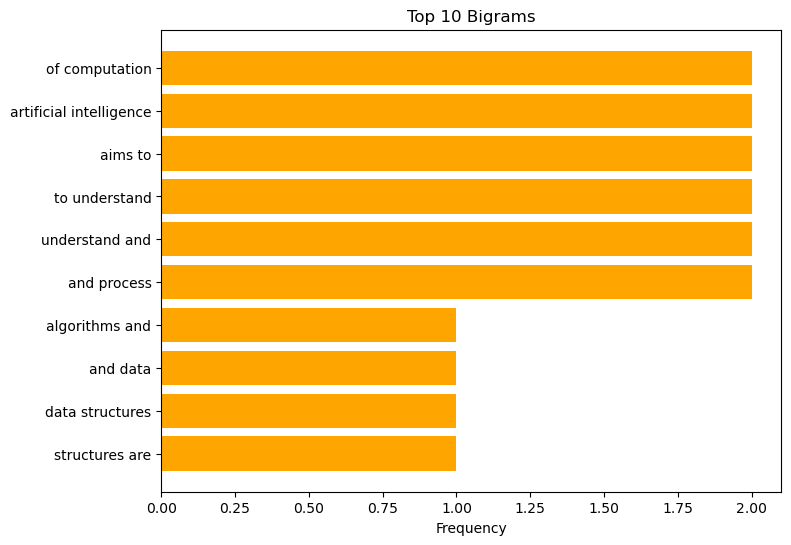

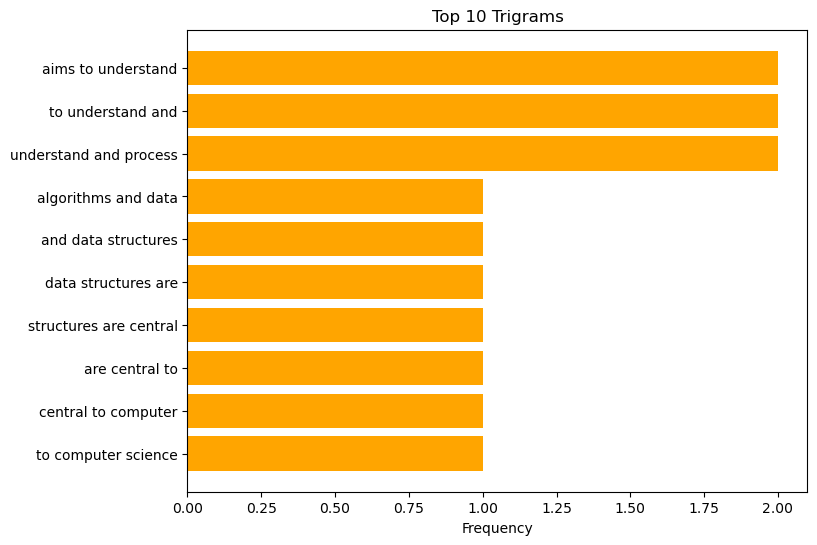

In [129]:
def plot_n_grams(n_grams, title):
    """
    Plots the top 10 n-grams and their frequencies as a horizontal bar chart.
    Parameters:
        n_grams (list of tuples): A list of tuples where each tuple contains an n-gram (as a tuple of words) and its frequency.
        title (str): The title of the plot.
    Returns:
        None
    """
    top_n_grams = n_grams[:10]
    labels, counts = zip(*top_n_grams)
    labels = [" ".join(label) for label in labels]

    plt.figure(figsize=(8, 6))
    plt.barh(labels, counts, color="orange")
    plt.xlabel("Frequency")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()


plot_n_grams(sorted_bi_grams, "Top 10 Bigrams")
plot_n_grams(sorted_tri_grams, "Top 10 Trigrams")